In [4]:
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import random
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
import torchvision
from torchvision import models, transforms

In [5]:
torch.manual_seed(1234)
np.random.seed(1234)
random.seed(1234)

In [22]:
class ImageTransform():
    
    """
    画像の前処理クラス
    画像のサイズを変更し、色を標準化する。
    訓練時と検証時で異なる動作をする。
    """
    
    def __init__(self, resize, mean, std):
        self.data_transform={
            'train':transforms.Compose([
                transforms.RandomResizedCrop(
                resize, scale=(0.5, 1.0)),
                transforms.RandomHorizontalFlip(),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ]),
            'val':transforms.Compose([
                transforms.Resize(resize),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ])
        }
        
    def __call__(self, img, phase='train'):
        
        return self.data_transform[phase](img)

In [28]:
#画像の読み込み
image_file_path='Documents/Watanabe_lab/Research_data/DeepLearning/train/m/20-390-2M-3.png'
img=Image.open(image_file_path)

In [29]:
#画像の前処理パラメータの設定
size=224
mean=(0.485,0.456,0.406)
std=(0.229,0.224,0.225)

#画像の前処理
transform=ImageTransform(size, mean, std)
img_transformed=transform(img, phase='train')

#(色、高さ、幅)を（高さ、幅、色）に変換し、0-1に値を制限
img_transformed=img_transformed.numpy().transpose((1,2, 0))
img_transformed=np.clip(img_transformed, 0, 1)

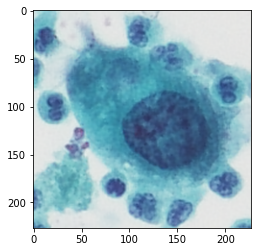

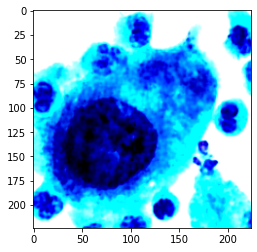

In [30]:
#画像の比較
plt.imshow(img)
plt.show()

plt.imshow(img_transformed)
plt.show()